In [1]:
from types import SimpleNamespace
import time
import numpy as np
import scipy as sp
from scipy import linalg
from scipy import optimize
from scipy import interpolate
import sympy as sm
import math
from math import log

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Cournot competition

- We consider a market with two firms (firm 1 and firm 2). They produce a homogenous good.
- They choose simultaneously what quantity to produce each. We note these quantities as $q_1$ and $q_2$. 
- The market price is decreasing in quantity and is given as: $P(q_1,q_2)=a-q_1-bq_2$. a is a constant and b denotes the elasticity of substitution between the two goods. If $b=1$, the goods are perfect substitutes. For the solutions, we put $b=1$.
- Both firms have the same marginal cost c, with $0 \le c<a$, and no fixed cost.
- The firms wish to maximize profits: ${\pi}_i(q_i,q_j)=P(q_i+q_j)q_i-cq_i$ 
- or: ${\pi_1}(q_1,q_2)=(a-q_1-q_2-c)q_1$ and ${\pi_2}(q_1,q_2)=(a-q_1-q_2-c)q_2$
- The solutions are best-response functions in a Nash Equilibrium where firm 1 is choosing the best response to firm 2 and vice versa.

In [129]:
#defining variables
Q=sm.symbols("Q")
q1=sm.symbols("q_1") 
q2=sm.symbols("q_2")
q1_star=sm.symbols("q_1^*") 
q2_star=sm.symbols("q_2^*")
qi=sm.symbols("q_i") 
qj=sm.symbols("q_j")
P=sm.symbols("P")
pi_1=sm.symbols("\pi_1")
pi_2=sm.symbols("\pi_2")

#defining paraameters
a=sm.symbols("a")
b=sm.symbols("b")
c=sm.symbols("c")

# Analytical solution

To find the analytical solution, we find the derivative for each profit function as the firms wish to maximize profits.

Solve in **five steps**:

1. **Take the derivative** wrt. $q_1$
2. **Isolate** $q_2$ from the foc for firm 1
3. **Substitute** in $q_2$ for firm 2
4. **Solve the FOC** for $q_1$
5. **substitute** to find $q_2$

In [134]:
#defining functions
profit_1=(a-q1-b*q2-c)*q1
profit_2=(a-q1-b*q2-c)*q2

In [138]:
#take derivatives of first profit function wrt. q_2
foc_1 = sm.diff(profit_1,q1)
sm.Eq(foc_1,0)

Eq(a - b*q_2 - c - 2*q_1, 0)

In [140]:
#take derivatives of second profit function
foc_2 = sm.diff(profit_2,q2)
sm.Eq(foc_2,0)

Eq(a - 2*b*q_2 - c - q_1, 0)

In [141]:
#isolate q_1 in foc_1
q1_from_profit_1 = sm.solve(sm.Eq(foc_1,0), q1)
q1_from_profit_1[0]
sm.Eq(q1,q1_from_profit_1[0])

Eq(q_1, a/2 - b*q_2/2 - c/2)

In [142]:
#substitute in to foc_2 
foc_2_subs=foc_2.subs(q1,q1_from_profit_1[0])
sm.Eq(foc_2_subs,0)

Eq(a/2 - 3*b*q_2/2 - c/2, 0)

In [143]:
#isolate q2
q_2_foc_2_subs=sm.solve(sm.Eq(foc_2_subs,0), q2)
sm.Eq(q2_star,q_2_foc_2_subs[0])

Eq(q_2^*, (a - c)/(3*b))

As the firms produce a homogenous good, we get the following solution:
$q_1^*=q_2^*=(a-c)/3$

For $a=3$ and $c=2$:
$q_1^*=q_2^*=1/3$

# Numerical solution

In [149]:
#defining functions
#market price as a function of quantity
def p(q1,q2,a,b):
    p = a - q1 - b*q2
    return p


#profits for firm 1
def pi_1(q1,q2,a,b,c):
    profits_1 = (p(q1,q2,a,b)-c)*q1
    return profits_1

#profits for firm 2
def pi_2(q1,q2,a,b,c):
    profits_2 = (p(q1,q2,a,b)-c)*q2
    return profits_2

In [145]:
#Defining a lower boundary, the lowest value of production quantity
q0 = [0]

#best responses 
def bestresp_1(q2,a,b,c):
    q1_star_num = optimize.minimize(lambda q0: -pi_1(q0,q2,a,b,c), q0).x[0]
    return q1_star_num

def bestresp_2(q1,a,b,c):
    q2_star_num = optimize.minimize(lambda q0: -pi_2(q1,q0,a,b,c), q0).x[0]
    return q2_star_num

We want to define a nash-equilibrium. This is done by looking for a fixed point where the best response for one firm is equal to what the other firm produces such that:

$\begin{pmatrix} q_1^* \\ q_2^* \end{pmatrix} = \begin{pmatrix} bestresp_1(q_2^*) \\ bestresp_2(q_1^*) \end{pmatrix}$

In [146]:
#Defining a nash-equilibrium as a fixed point
def nash_eq(q,param): # vector param = (a,c)
    return np.array(q)-np.array([bestresp_1(q[1],param[0],param[1],param[2]),bestresp_2(q[0],param[0],param[1],param[2])])

In [151]:
inital_values = [0.1,0.1]
param = [3,1,2]

In [152]:
solver = optimize.fsolve(nash_eq,inital_values, args = (param))
print(f'The Nash Equilibrium is at: {solver}')

The Nash Equilibrium is at: [0.33333333 0.33333333]


# Plotting the results

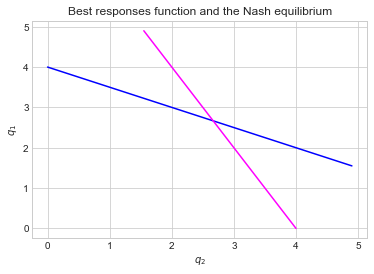

In [154]:
production_f2 = np.arange(0,5,0.1)
production_f1 = []

# b: creating figure 
for q2 in production_f2:
    q1 = round(bestresp_1(q2,8,1,0),3)
    production_f1.append(q1)

plt.title("Best responses function and the Nash equilibrium")
plt.ylabel("$q_1$")
plt.xlabel("$q_2$")
plt.plot(production_f2, production_f1, color='blue')
plt.plot(production_f1, production_f2, color='magenta')


For the following interactive graph, we want to see what happens if $b≠1$ so the goods are not perfect subtitutes.

In [166]:
# a: defining production levels 
q_1_interactive = np.arange(0,1,0.1)
q_2_interactive = np.arange(0,1,0.1)

# b: 
def f(substitution_rate):

    x = []
    y = []

    for q2 in q_2_interactive:
        q1 = round(bestresp_1(q2,3,substitution_rate,2),3)
        x.append(q1)

    for q1 in q_1_interactive:
        q2 = round(bestresp_2(q1,3,substitution_rate,2),3)
        y.append(q2)

    plt.title("Best response for firm 1 (pink) and best response for\nfirm 2 (blue) given produciton level of the other firm")
    plt.ylabel("$BR(q_i)$")
    plt.xlabel("$q_i$")
    plt.plot(q_2_interactive,x,color='blue')
    plt.plot(q_1_interactive,y,color='magenta')

widgets.interact(f,
    substitution_rate = widgets.FloatSlider(description="$b$",min=1,max=5),
 )

interactive(children=(FloatSlider(value=1.0, description='$b$', max=5.0, min=1.0), Output()), _dom_classes=('w…

<function __main__.f(substitution_rate)>

According to the analytical solution, the optimal quantity for firm 2, $q_2^*$, will be lower when b is higher. This is also what see in the graph. As b tends to infinity, $q_2^*$ tends to 0.

# Model extension: Cournot model with three firms

In [94]:
# Define the functions for the three-firms case
def p3(q1,q2,q3,a):
    p3 = a - q1 - q2 - q3
    return p3

#profits for firm 1
def pi3_1(q1,q2,q3,a,c):
    profits_1 = (p3(q1,q2,q3,a)-c)*q1
    return profits_1

#profits for firm 2
def pi3_2(q1,q2,q3,a,c):
    profits_2 = (p3(q1,q2,q3,a)-c)*q2
    return profits_2

#profits for firm 3
def pi3_3(q1,q2,q3,a,c):
    profits_3 = (p3(q1,q2,q3,a)-c)*q3
    return profits_3

In [95]:
#Lowest value
q0 = [0]

#best responses 
def bestresp3_1(q2,q3,a,c):
    q1_star_num = optimize.minimize(lambda q0: -pi3_1(q0,q2,q3,a,c), q0).x[0]
    return q1_star_num

def bestresp3_2(q1,q3,a,c):
    q2_star_num = optimize.minimize(lambda q0: -pi3_2(q1,q0,q3,a,c), q0).x[0]
    return q2_star_num

def bestresp3_3(q1,q2,a,c):
    q3_star_num = optimize.minimize(lambda q0: -pi3_3(q1,q2,q0,a,c), q0).x[0]
    return q3_star_num

In [96]:
def nash_eq_3f(q,param): # vector param = (a,c)
    return np.array(q)-np.array([bestresp3_1(q[1],q[2],param[0],param[1]),bestresp3_2(q[0],q[2],param[0],param[1]),bestresp3_3(q[0],q[1],param[0],param[1])])

In [97]:
inital_values_3f = [1,1,1]
param = [3,2]

In [98]:
solver = optimize.fsolve(nash_eq_3f,inital_values_3f, args = (param))
print(f'The Nash Equilibrium is at: {solver}')

The Nash Equilibrium is at: [0.25 0.25 0.25]


SyntaxError: invalid syntax (754598434.py, line 1)